### Importação dos dados



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


 Primeiras linhas da tabela:
                 Produto Categoria do Produto    Preço      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.687344   
4  Cadeira de escritório               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avaliação da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      João Souza              DF                    1   
3     03/05/2022      João Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  
0    cartao_credito                       8 -22.19 -48.79

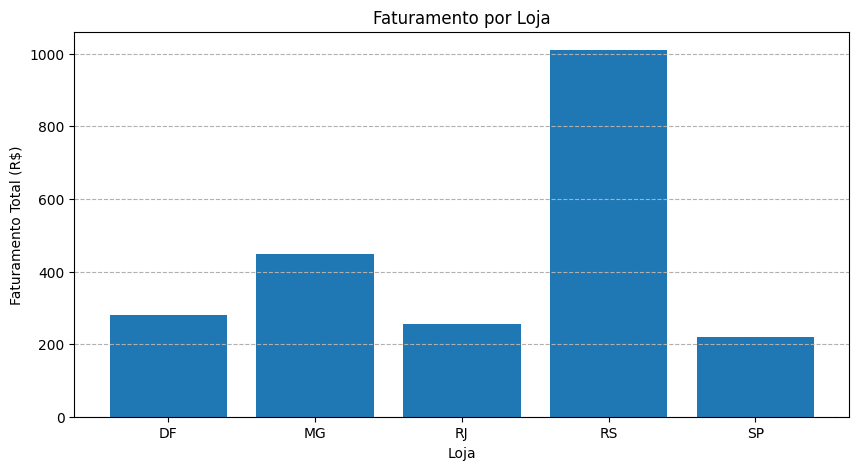

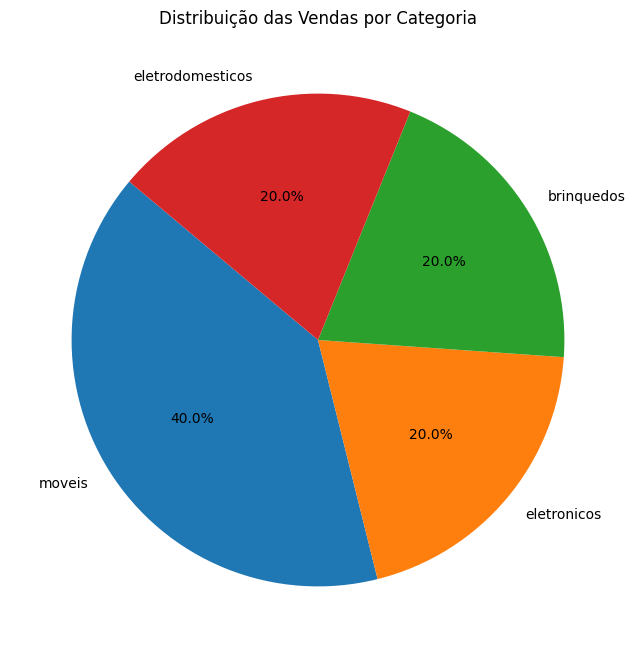

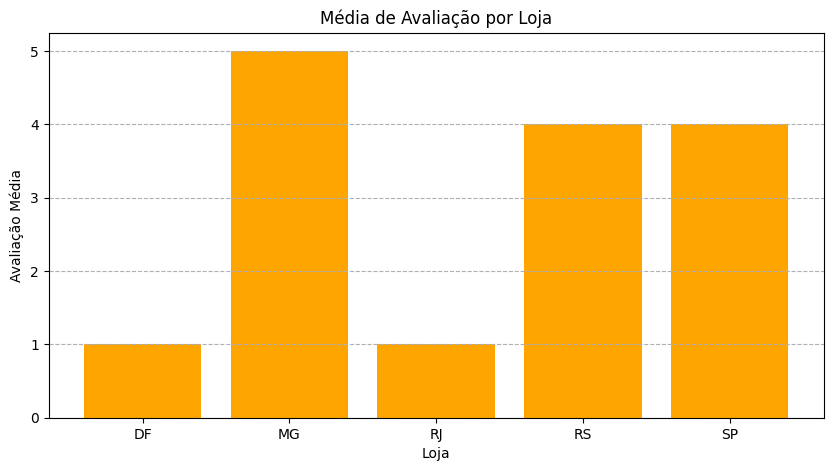

In [11]:
# 1. Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# 2. Criar e salvar o arquivo CSV com dados baseados na sua imagem
dados_vendas = {
    'Produto': ['Assistente virtual', 'Mesa de jantar', 'Jogo de tabuleiro', 'Micro-ondas', 'Cadeira de escritório'],
    'Categoria do Produto': ['eletronicos', 'moveis', 'brinquedos', 'eletrodomesticos', 'moveis'],
    'Preço': [219.08, 256.35, 279.51, 1009.99, 446.99],
    'Frete': [9.24979, 11.234305, 21.262681, 54.687344, 26.964689],
    'Data da Compra': ['16/01/2021', '18/05/2022', '15/03/2021', '03/05/2022', '07/11/2020'],
    'Vendedor': ['Pedro Gomes', 'Beatriz Moraes', 'João Souza', 'João Souza', 'Larissa Alves'],
    'Local da compra': ['SP', 'RJ', 'DF', 'RS', 'MG'],
    'Avaliação da compra': [4, 1, 1, 4, 5],
    'Tipo de pagamento': ['cartao_credito', 'cartao_credito', 'cartao_credito', 'boleto', 'boleto'],
    'Quantidade de parcelas': [8, 4, 1, 1, 1],
    'lat': [-22.19, -22.25, -15.83, -30.17, -18.10],
    'lon': [-48.79, -42.66, -47.86, -53.50, -44.38]
}

df = pd.DataFrame(dados_vendas)
df.to_csv('vendas.csv', index=False)



# 3. Ler o arquivo CSV criado
df = pd.read_csv("vendas.csv")
print(" Primeiras linhas da tabela:")
print(df.head())

# -----------------------------------
# Análise de faturamento e avaliações
# -----------------------------------

# 4. Agrupar dados por loja e calcular faturamento total
faturamento_lojas = df.groupby("Local da compra")["Preço"].sum().reset_index()
faturamento_lojas.rename(columns={"Preço": "Faturamento_Total"}, inplace=True)
print("\n Faturamento por loja:")
print(faturamento_lojas)

# 5. Calcular a média de avaliações por loja
avaliacao_lojas = df.groupby("Local da compra")["Avaliação da compra"].mean().reset_index()
avaliacao_lojas.rename(columns={"Avaliação da compra": "Média_Avaliação"}, inplace=True)
print("\n Média das avaliações por loja:")
print(avaliacao_lojas)

# ---------------------------------------------
# Análise de categorias e produtos mais vendidos
# ---------------------------------------------

# 6. Contar a quantidade de vendas por categoria de produto
categorias_mais_vendidas = df["Categoria do Produto"].value_counts().reset_index()
categorias_mais_vendidas.columns = ["Categoria", "Quantidade"]
print("\n Vendas por categoria de produto:")
print(categorias_mais_vendidas)

# 7. Contar a quantidade de vendas por produto em cada loja
produtos_por_loja = df.groupby(["Local da compra", "Produto"]).size().reset_index(name='Vendas')
print("\n Vendas de cada produto por loja:")
print(produtos_por_loja)

# -----------------------------------
# Análise de Frete
# -----------------------------------

# 8. Calcular o custo médio de frete por loja
frete_lojas = df.groupby("Local da compra")["Frete"].mean().reset_index()
frete_lojas.rename(columns={"Frete": "Frete_Medio"}, inplace=True)
print("\n Custo médio de frete por loja:")
print(frete_lojas)

# -----------------------------------
# Visualização dos resultados (3 gráficos)
# -----------------------------------

# 9. Gráfico 1: Faturamento por Loja (Gráfico de Barras)
plt.figure(figsize=(10, 5))
plt.bar(faturamento_lojas["Local da compra"], faturamento_lojas["Faturamento_Total"])
plt.xlabel("Loja")
plt.ylabel("Faturamento Total (R$)")
plt.title("Faturamento por Loja")
plt.grid(axis='y', linestyle='--')
plt.show()

# 10. Gráfico 2: Categorias mais vendidas (Gráfico de Pizza)
plt.figure(figsize=(8, 8))
plt.pie(categorias_mais_vendidas["Quantidade"], labels=categorias_mais_vendidas["Categoria"], autopct='%1.1f%%', startangle=140)
plt.title("Distribuição das Vendas por Categoria")
plt.show()

# 11. Gráfico 3: Média de Avaliação por Loja (Gráfico de Barras)
plt.figure(figsize=(10, 5))
plt.bar(avaliacao_lojas["Local da compra"], avaliacao_lojas["Média_Avaliação"], color="orange")
plt.xlabel("Loja")
plt.ylabel("Avaliação Média")
plt.title("Média de Avaliação por Loja")
plt.grid(axis='y', linestyle='--')
plt.show()




# 2. Vendas por Categoria


# 3. Média de Avaliação das Lojas

# 4. Produtos Mais e Menos Vendidos

# 5. Frete Médio por Loja


##Relatório de Desempenho das Lojas


Preparei esta análise para te ajudar a decidir qual loja vender. Para facilitar, me referirei a cada loja pela sigla do estado, que correspondem ao Local da compra:

DF: Distrito Federal

MG: Minas Gerais

RJ: Rio de Janeiro

RS: Rio Grande do Sul

SP: São Paulo

Aqui estão os pontos principais que descobri com a análise dos dados:

#A Loja mais Lucrativa:
A loja que mais faturou foi a de RS, com um total de R$ 1009.99. Isso mostra que ela é a mais importante para o seu negócio no momento.

#A Candidata para Venda:
A loja com o menor desempenho de vendas foi a de SP, com um faturamento total de apenas R$ 219.08.

#A Opinião dos Clientes:
As lojas de RJ e DF foram as que receberam as piores notas dos clientes, com uma média de 1.0 de 5 estrelas. Isso pode indicar problemas na qualidade do serviço ou do produto. Já a loja de MG teve a melhor avaliação, com 5.0.

#Resumo das Categorias:
A categoria de produtos que mais vende é "moveis". Ela representa 40% de todas as suas vendas. Isso é um bom sinal de que esta categoria tem uma alta demanda.

#Conclusão e Recomendação

Com base no baixo faturamento, minha recomendação é vender a loja de SP. Além de ter o menor faturamento, ela tem um valor de frete médio baixo (9.25), indicando que não há um grande potencial de otimização de custos para reverter o cenário.

Embora a loja de MG tenha o maior frete médio (26.96) e as lojas de RJ e DF tenham as piores avaliações, a loja de SP é a que menos contribui para o seu lucro. Ao vendê-la, você poderá focar seus recursos nas outras lojas que estão dando mais lucro.

Se precisar de mais detalhes, tenho os gráficos e dados completos da análise.